<a href="https://colab.research.google.com/github/inayatulinayah/KNN/blob/master/AMPDs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('/content/drive/My Drive/Thesis/Electricity_P.csv', delimiter=";")

In [4]:
data.shape

(1048575, 24)

In [5]:
data1 = data
data1['UNIX_TS'] = [datetime.fromtimestamp(waktu) for waktu in data['UNIX_TS']]

In [6]:
data1 = data1.set_index("UNIX_TS")

In [7]:
data1 = data
data1 = data.iloc[0:600000]

In [8]:
data1.shape

(600000, 24)

In [9]:
data1.head()

,UNIX_TS,WHE,RSE,GRE,MHE,B1E,BME,CWE,DWE,EQE,FRE,HPE,OFE,UTE,WOE,B2E,CDE,DNE,EBE,FGE,HTE,OUE,TVE,UNE
0,2012-04-01 07:00:00,918,43,2,873,0,352,0,0,41,106,36,62,9,0,58,0,30,0,0,4,0,37,138
1,2012-04-01 07:01:00,913,43,0,870,0,354,0,0,35,107,37,61,9,0,58,0,30,0,0,4,0,37,138
2,2012-04-01 07:02:00,872,43,2,827,0,354,0,0,41,107,38,61,9,0,8,0,30,0,0,4,0,37,138
3,2012-04-01 07:03:00,872,43,2,827,0,354,0,0,40,106,37,61,9,0,7,0,30,0,0,4,0,37,142
4,2012-04-01 07:04:00,772,41,2,729,0,352,0,0,40,106,36,61,9,0,8,0,31,0,0,4,0,37,45


In [10]:
data.columns

Index(['UNIX_TS', 'WHE', 'RSE', 'GRE', 'MHE', 'B1E', 'BME', 'CWE', 'DWE',
       'EQE', 'FRE', 'HPE', 'OFE', 'UTE', 'WOE', 'B2E', 'CDE', 'DNE', 'EBE',
       'FGE', 'HTE', 'OUE', 'TVE', 'UNE'],
      dtype='object')

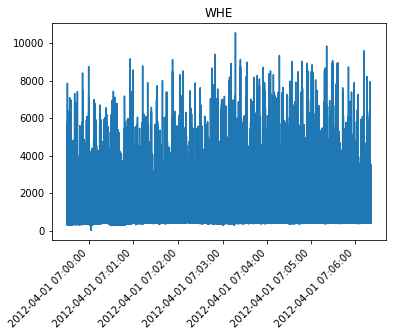

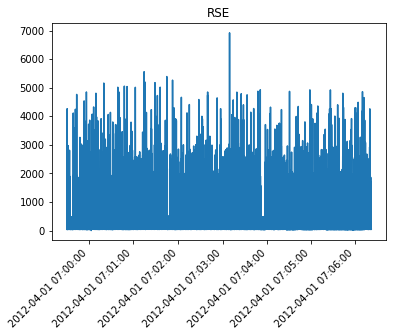

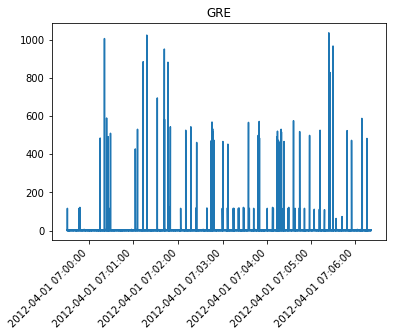

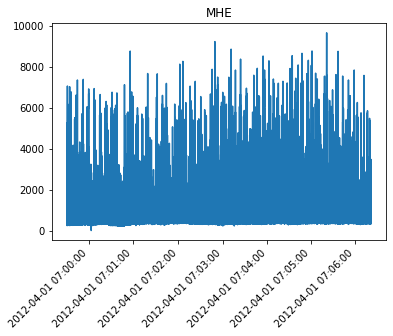

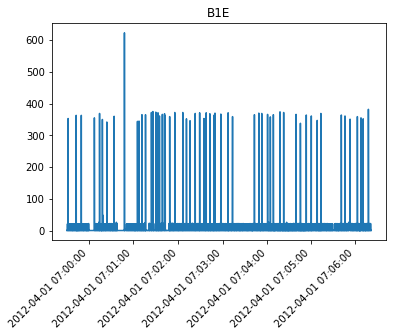

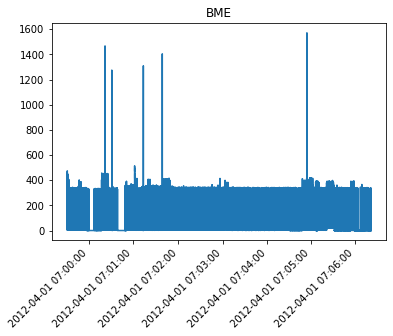

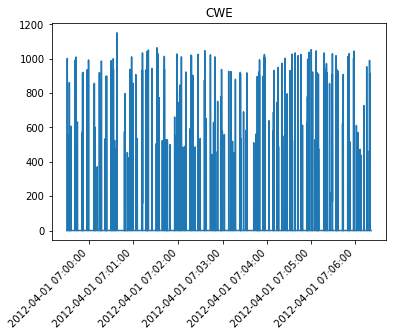

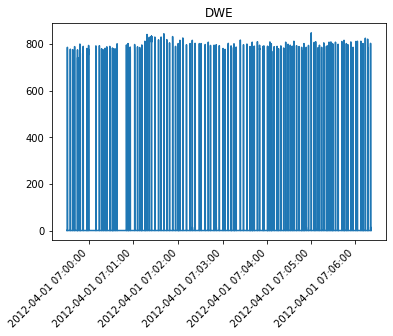

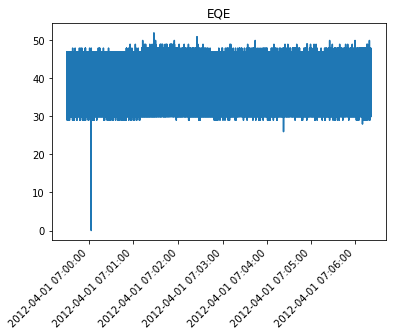

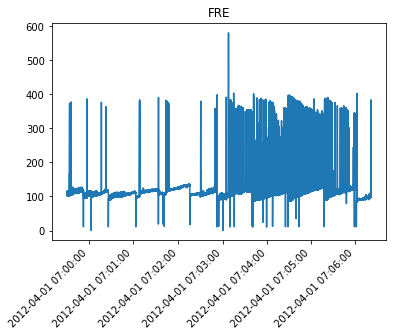

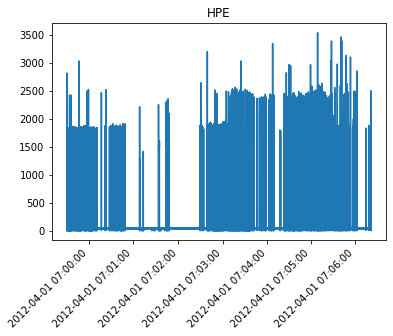

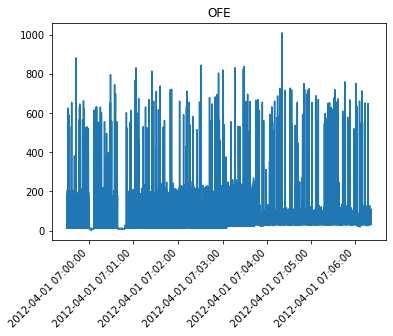

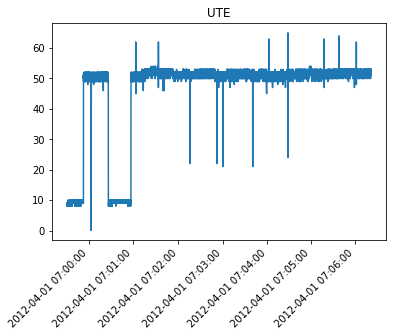

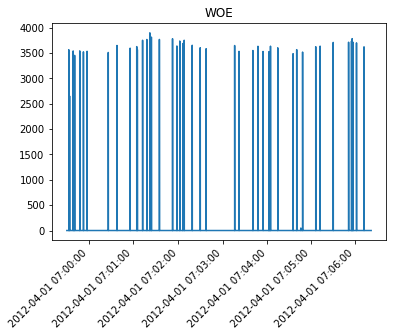

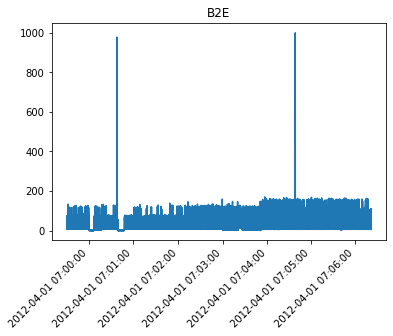

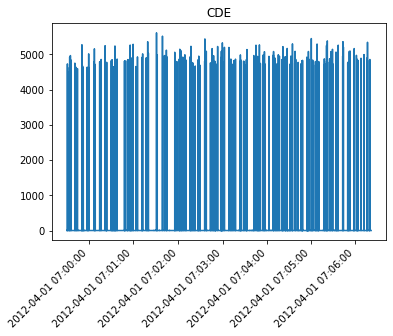

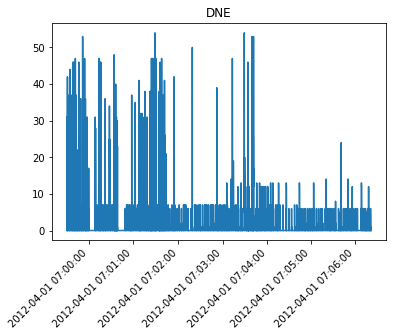

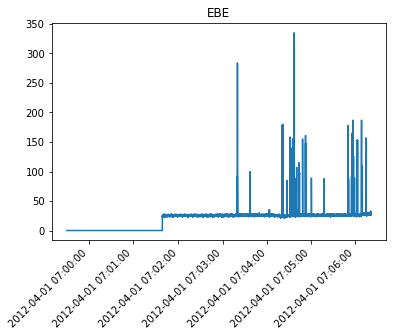

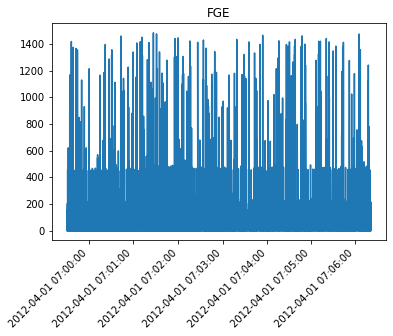

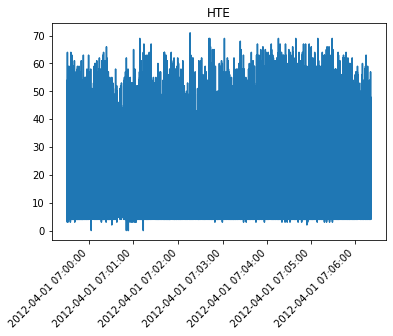

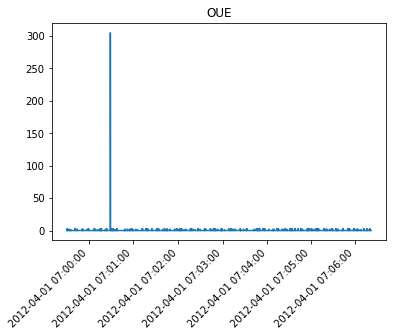

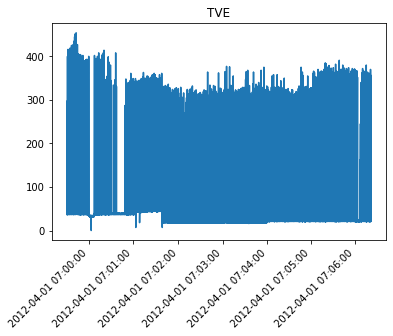

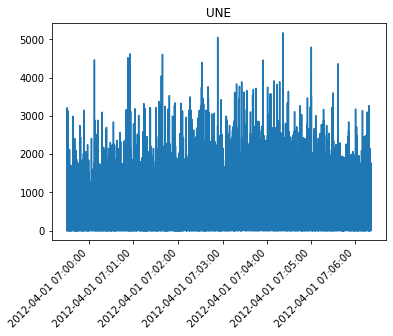

In [11]:
for i in data1.drop('UNIX_TS', axis=1):
  fig = plt.figure()
  axes = fig.add_subplot(111)
  plt.title(i)
  plt.plot(data1['UNIX_TS'],data1[i])
  axes.set_xticklabels(data1['UNIX_TS'], rotation = 45, ha="right")
  plt.show()

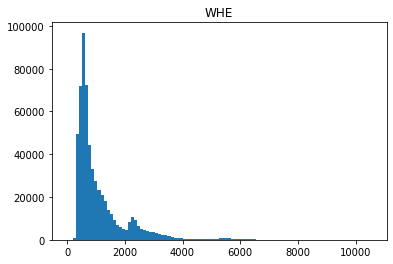

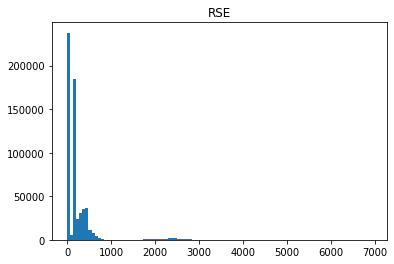

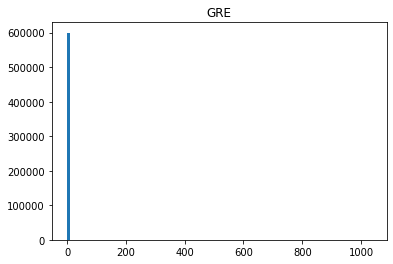

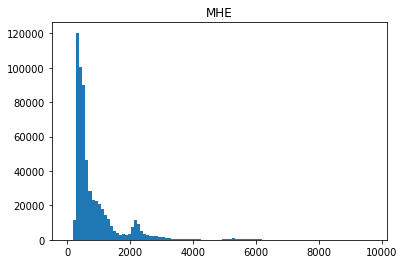

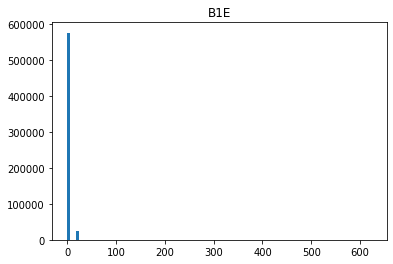

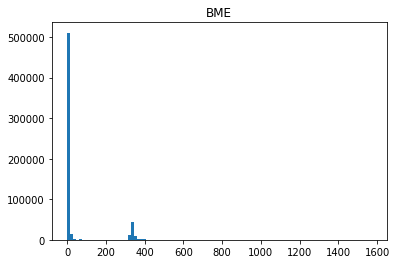

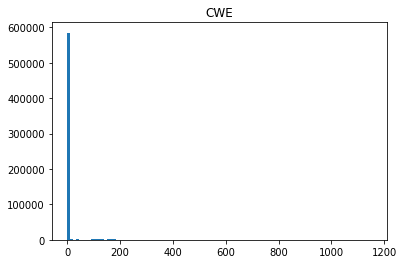

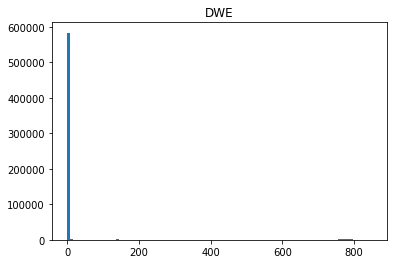

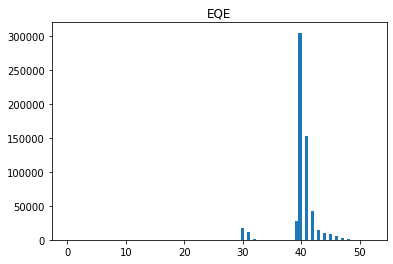

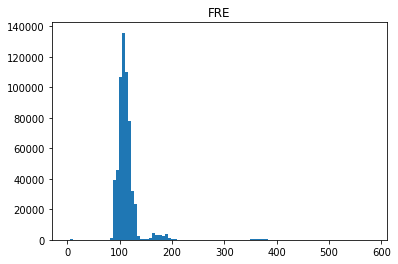

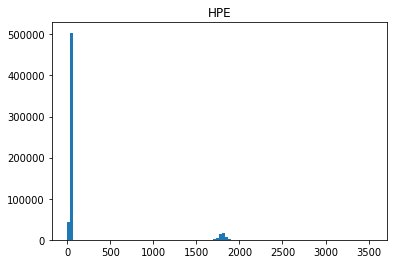

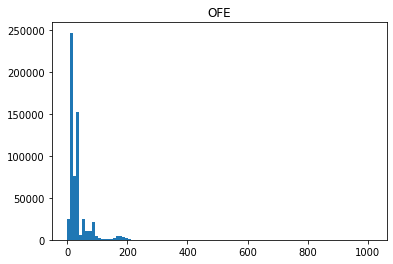

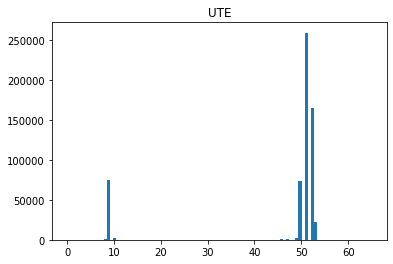

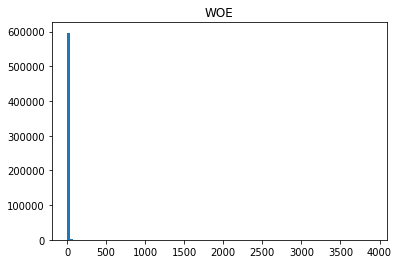

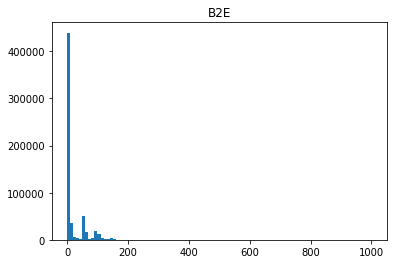

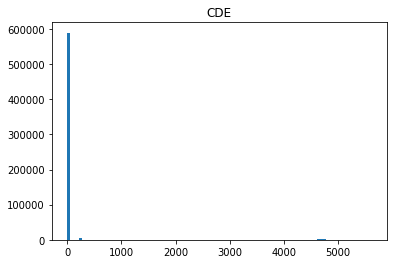

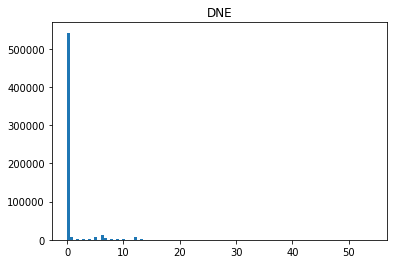

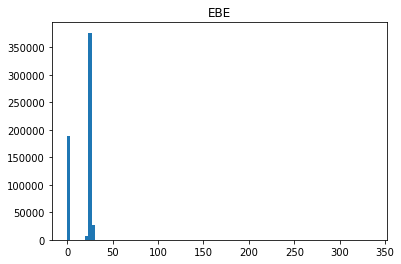

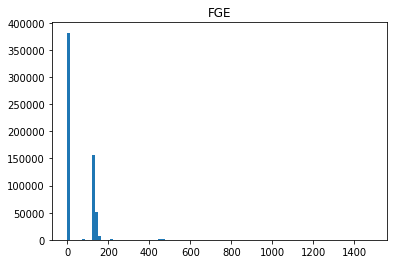

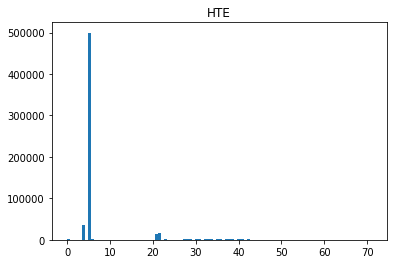

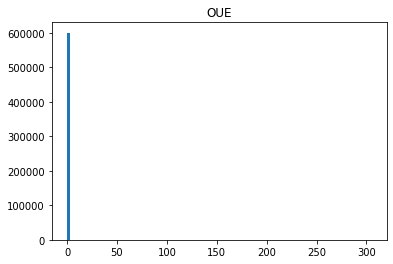

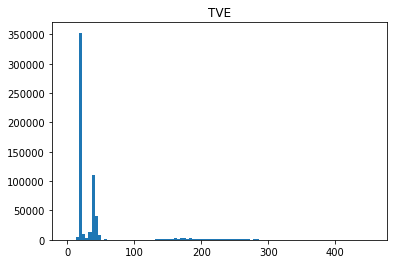

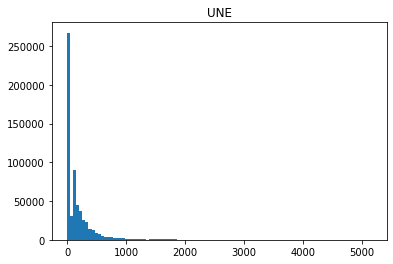

In [12]:
for i in data1.drop('UNIX_TS', axis=1):
  fig = plt.figure()
  axes = fig.add_subplot(111)
  plt.title(i)
  axes.hist(data1[i], bins=100, range=[0,data1[i].max()])
  # axes.set_xticklabels(X_test.index, rotation = 45, ha="right")
  plt.show()

In [13]:
output_label = ["CWE", "DWE", "WOE", "CDE", "FGE", "HPE"]

In [14]:
InputWHE1 = data1[output_label].to_numpy().sum(axis=1)
InputWHE1 = pd.DataFrame(InputWHE1, index=data1["UNIX_TS"])

In [15]:
InputWHE1.head()

,0
UNIX_TS,
2012-04-01 07:00:00,36
2012-04-01 07:01:00,37
2012-04-01 07:02:00,38
2012-04-01 07:03:00,37
2012-04-01 07:04:00,36


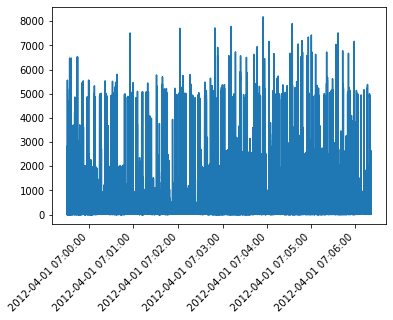

In [16]:
fig = plt.figure()
axes = fig.add_subplot(111)
plt.plot(data1["UNIX_TS"],InputWHE1)
axes.set_xticklabels(data1['UNIX_TS'], rotation = 45, ha="right")
plt.show()

In [17]:
from sklearn.cluster import KMeans
cluster = {}
for i in output_label:
  kmeans = KMeans(n_clusters=2).fit(data1[i].to_numpy().reshape(-1, 1))
  cluster[i] = kmeans.predict(data1[i].to_numpy().reshape(-1, 1))

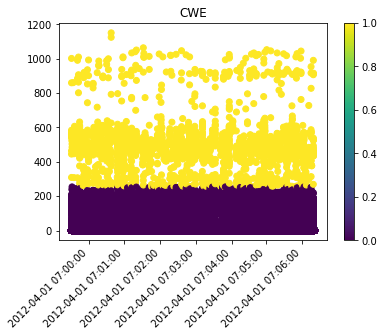

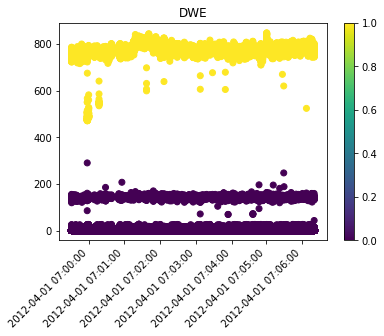

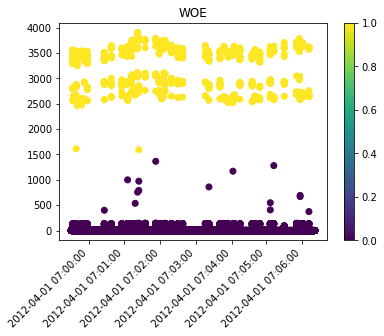

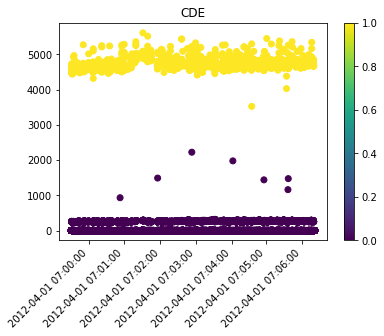

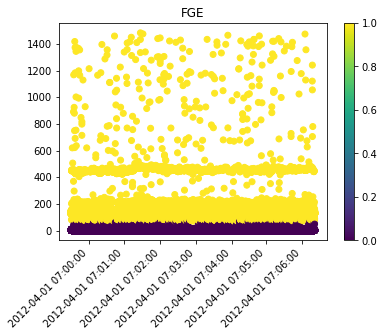

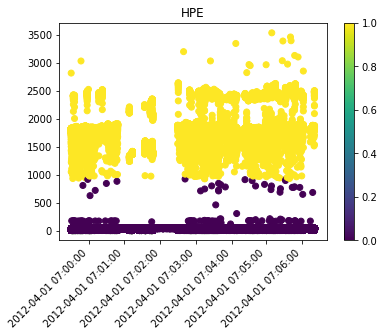

In [18]:
for i in output_label:  
  fig = plt.figure()
  axes = fig.add_subplot(111)
  plt.title(i)
  plt.scatter(data1["UNIX_TS"],data1[i],c=cluster[i])
  axes.set_xticklabels(data1['UNIX_TS'], rotation = 45, ha="right")
  plt.colorbar()
  plt.show()

In [19]:
cluster["UNIX_TS"] = data1["UNIX_TS"]

In [20]:
clusterpd = pd.DataFrame.from_dict(cluster)
clusterpd = clusterpd.set_index("UNIX_TS")

In [21]:
X_train, X_test, y_train, y_test = train_test_split(InputWHE1, clusterpd, test_size=0.30, random_state=42)

In [22]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(420000, 1)
(180000, 1)
(420000, 6)
(180000, 6)


In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
akurasi = []
for i in range(1,10):
  knn = KNeighborsClassifier(n_neighbors=i).fit(X_train,y_train)
  predict = knn.predict(X_test)
  akurasi.append(accuracy_score(y_test,predict))

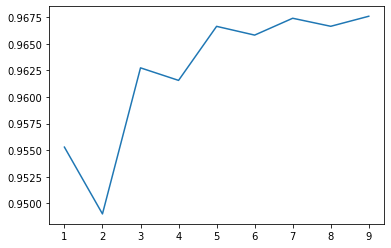

In [24]:
plt.plot(range(1,10),akurasi)
plt.show()

In [25]:
knn = KNeighborsClassifier(n_neighbors=9, metric='minkowski')

In [26]:
knn.fit(X_train,y_train)
predict = knn.predict(X_test)

In [27]:
print("Nilai Akurasi =",accuracy_score(y_test, predict))
print("Jumlah Data Prediksi Yang benar =",accuracy_score(y_test, predict, normalize=False))
print("Jumlah Data Prediksi =",y_test.shape[0])

Nilai Akurasi = 0.9675888888888889
Jumlah Data Prediksi Yang benar = 174166
Jumlah Data Prediksi = 180000


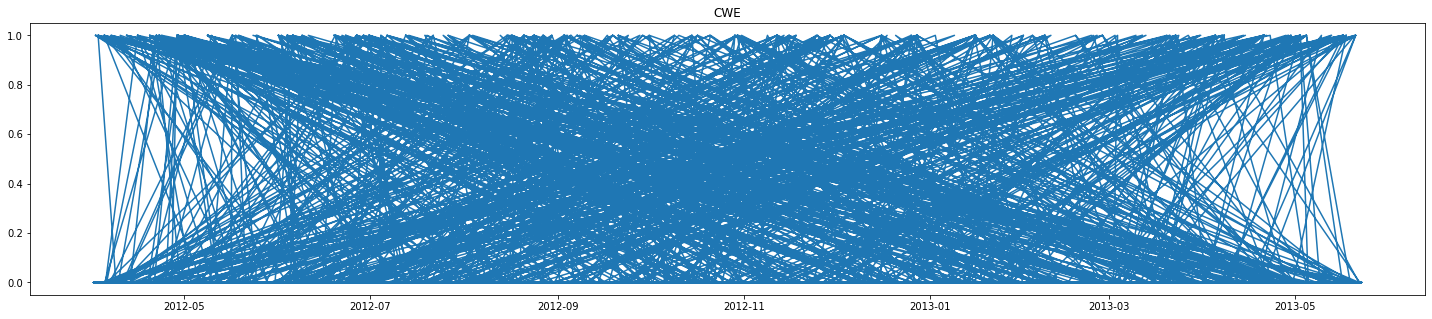

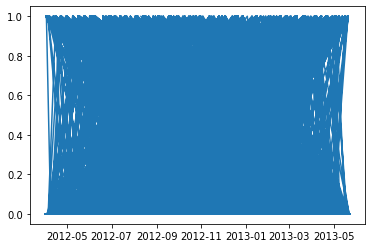

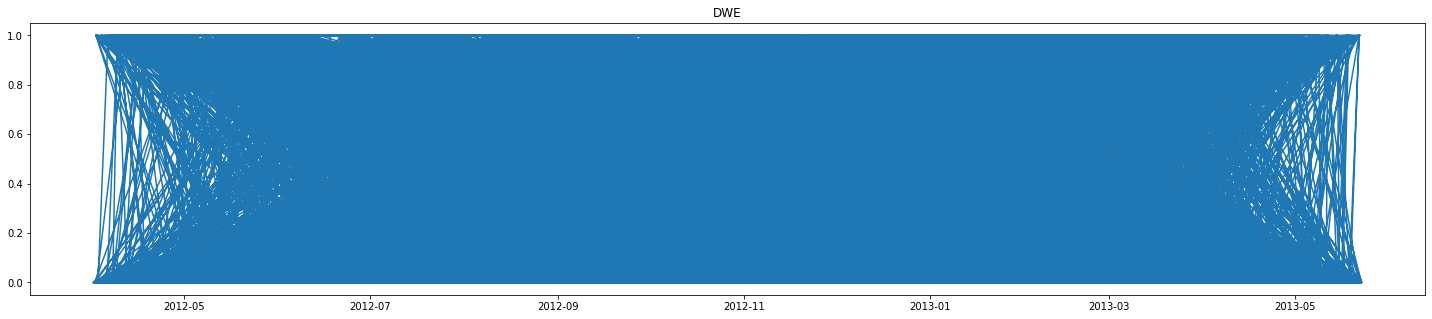

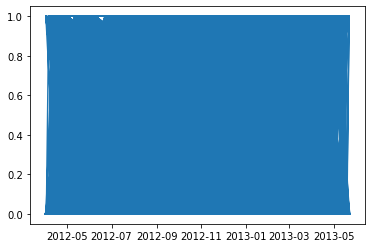

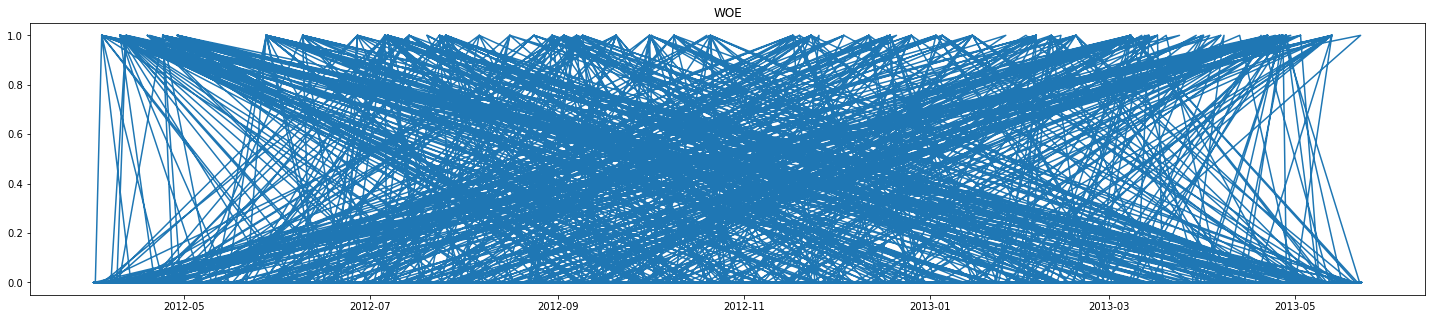

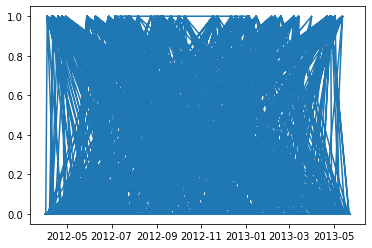

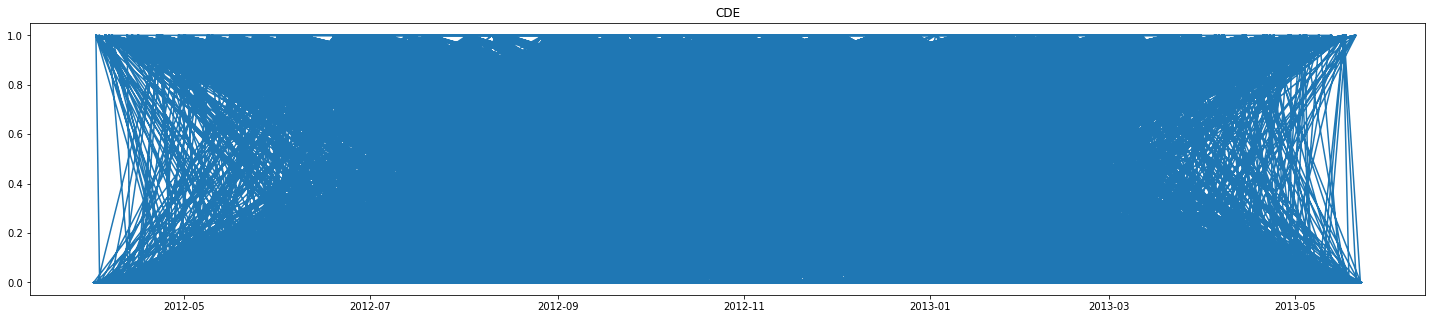

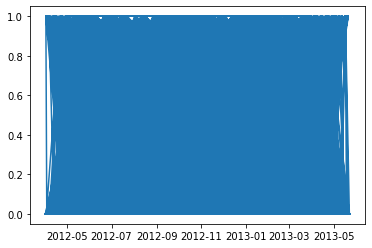

OverflowError: ignored

<Figure size 1800x360 with 1 Axes>

OverflowError: ignored

<Figure size 432x288 with 1 Axes>

OverflowError: ignored

<Figure size 1800x360 with 1 Axes>

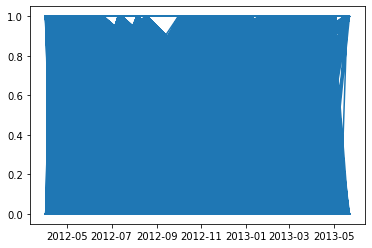

In [31]:
for i,e in enumerate(output_label):
  fig = plt.figure(figsize=(25,5))
  axes = fig.add_subplot(111)
  plt.title(e)
  plt.plot(y_test.index,predict[:,i])
  plt.show()
  plt.plot(y_test.index,y_test[e])
  plt.show()

(array([5.34301e+05, 1.01670e+04, 4.60840e+04, 2.31800e+03, 5.19000e+02,
        4.42000e+03, 1.58200e+03, 2.56000e+02, 3.20000e+02, 3.30000e+01]),
 array([   0. ,  818.1, 1636.2, 2454.3, 3272.4, 4090.5, 4908.6, 5726.7,
        6544.8, 7362.9, 8181. ]),
 <a list of 10 Patch objects>)

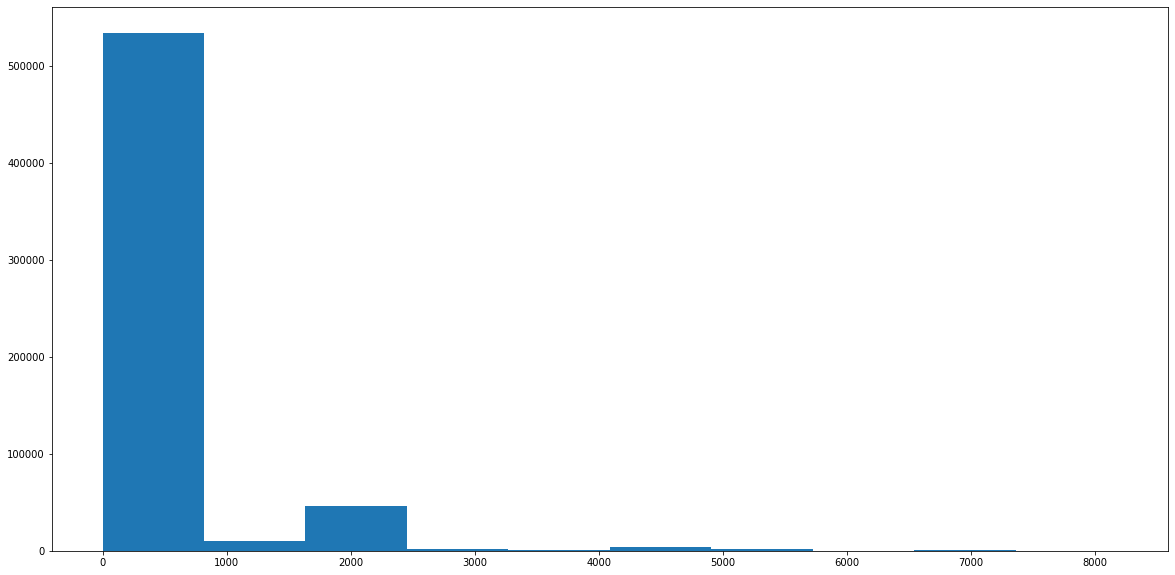

In [ ]:
plt.figure(figsize=[20,10])
plt.hist(InputWHE1)